In [1]:
import sys
sys.path.append("../")

# Look at Simulated Data

In [31]:
%load_ext autoreload
%autoreload 2
from scGraphLLM.utils import simulate_data
import networkx as nx
import matplotlib.pyplot as plt
from torch_geometric.utils import to_networkx

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [125]:
nclass = 3
ngraphs = 5

In [126]:
datasets = simulate_data(num_classes=nclass, graphs_per_class=ngraphs, num_nodes_per_graph=10, 
                         num_edges_per_graph=20, node_embedding_dim=32)

In [127]:
from scGraphLLM.utils import CombinedDataset

In [128]:
combined_dataset = CombinedDataset(datasets)

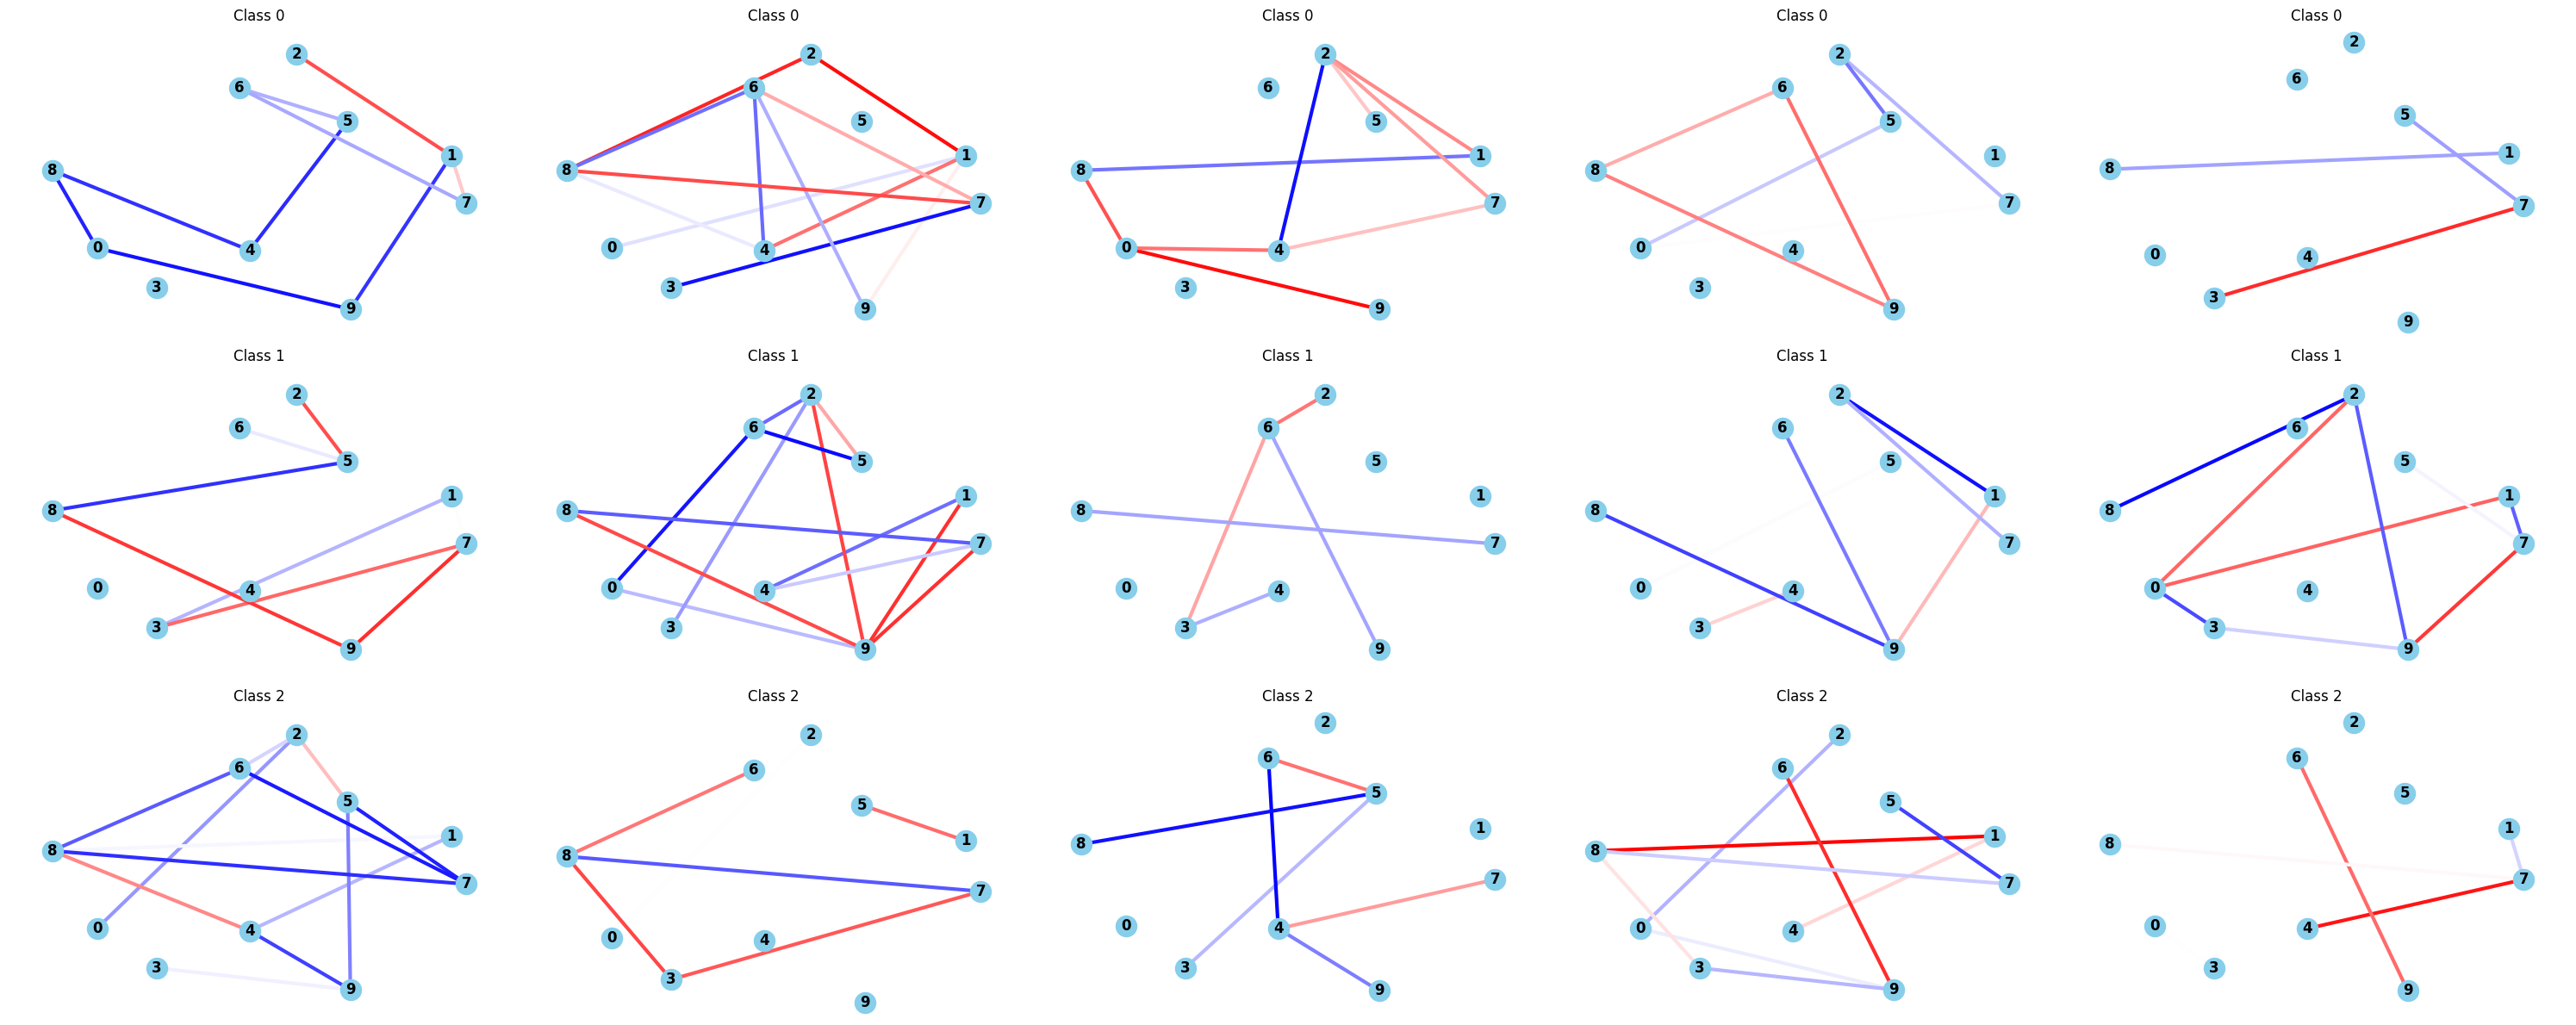

In [129]:
fig, axes = plt.subplots(nrows=nclass, ncols=ngraphs, figsize=(20 * (nclass / 2), 8 * (nclass / 2)))
axes = axes.flatten()

data = combined_dataset[0]
G = to_networkx(data, to_undirected=True)
pos = nx.spring_layout(G, k=2)

for i in range(len(combined_dataset)):
    # Convert the i-th graph to a networkx graph
    data = combined_dataset[i]
    G = to_networkx(data, to_undirected=True)
    ax = axes[i]
    cmap = plt.cm.bwr
    edge_weights = [data.edge_attr[j].item() for j in range(data.edge_attr.size(0))]
    edge_colors = [cmap(weight) for weight in edge_weights]
    nx.draw(G, ax=ax, pos=pos, with_labels=True, node_color='skyblue', node_size=300, font_weight='bold', width=3, edge_color=edge_colors)
    ax.set_title(f'Class {data.y.item()}')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [130]:
from sklearn.decomposition import PCA

In [131]:
import torch

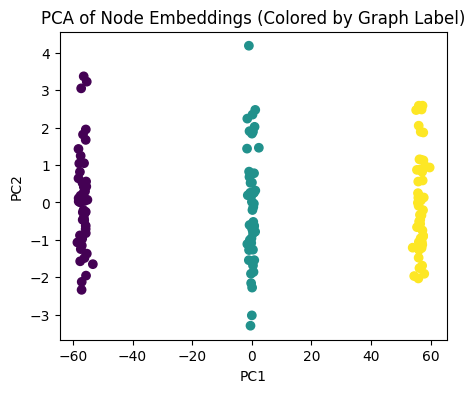

In [132]:
all_embeddings = torch.cat([data.x for data in combined_dataset], dim=0)
all_labels = torch.cat([data.y.repeat(data.x.shape[0]) for data in combined_dataset], dim=0)

pca = PCA(n_components=2)
pca_embeddings = pca.fit_transform(all_embeddings)

plt.figure(figsize=(5, 4))
plt.scatter(pca_embeddings[:, 0], pca_embeddings[:, 1], c=all_labels)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of Node Embeddings (Colored by Graph Label)')
plt.show()